## Inversión por factores
### Adrián Vázquez
#### 22/7/21

## CAPM

###  Modelo de fijación de precios de activos de capital 


<b> CAPM se basa en $ \beta $ </b>

 $ \beta $ Es su exposición a una amplia cartera de referencia de mercado regional

La tasa libre de riesgo utilizada tambien es regional y se resta tanto de su cartera y rentabilidad de la cartera de referencia para permitir un mejor análisis de su verdadera exposición. 


una alta $ \beta $ significa una alta exposición al mercado y un baja $ \beta $  o incluso negativa significa exposición baja o negativa a los movimientos del mercado

$ \beta$ se obtiene: 

## $ \beta_{p} =  \frac{cov(R_{P}, R_{B})}{Var(R_{B})}$

 $ \beta_{p}$ Portafolio beta
 
 $ cov(R_{P}, R_{B})$ La covarianza entre el portafolio (P) y  el indice de mercado de referencia (B)
  
 $ Var(R_{B})$  La varianza del indice del mercado de referencia 
  

### Ejercicio


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
FamaFrenchData= pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/3d9b734fea954b629d2477ef48c36525dfecf6e0/FamaFrenchFactors.csv')

In [4]:
FamaFrenchData.head(2)

,Date,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
0,2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
1,2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0


### Calcular el exceso de rendimientos  

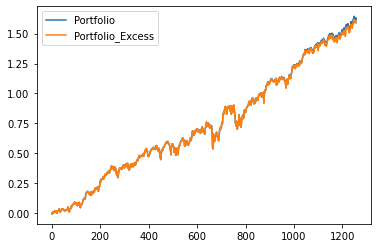

<Figure size 720x360 with 0 Axes>

In [5]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']
# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.figure(figsize = (10,5))
plt.show()

##   Calcular Beta

In [6]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()
# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print('Coeficiente de covarianza: ', covariance_coefficient)
# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print('Covarianza del marcador de indice :',  benchmark_variance)
# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient / benchmark_variance
print('Portafolio beta:  ', portfolio_beta)

Coeficiente de covarianza:  5.726126338154974e-05
Covarianza del marcador de indice : 5.8803350882118946e-05
Portafolio beta:   0.9737755165745473


### CAPM
- Modelar rendimientos de acciones 

### $ E(R_{P}) - RF = \beta_{P}(E(R_{M}) - RF)  $

$ E(R_{P}) - RF$. Exceso de rendimiento esperado de una acción o portafolio P

$ E(R_{M}) - RF)$. Exceso de rendimiento esperado de la cartera de mercado amplio B

$ RF $. La tasa regional libre de riesgo 

$ \beta_{P}$. Portafolio Beta

-  Con una regresión lineal tambien es posible obtener $ \beta$

In [7]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 
# Define the regression formula
# 'Portfolio_Excess ~ Market_Excess ' <-- significa que el portafolio_excess es funci-
# ón de market_Excess

CAPM_model = smf.ols(formula= 'Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)
# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print('r cuadrada  adjunto', CAPM_fit.rsquared_adj)
# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print('Beta', regression_beta)

r cuadrada  adjunto 0.7942627160017837
Beta 0.9737755165745478


## Conclusión. 

- Your portfolio beta is once again 0.9738. The adjusted r-squared is 0.7943. A high adjusted r-squared (close to 1) means that the majority of your portfolio's movements can be explained by the factors in your model.

## El modelo de 3 factores de Fama-French para gestión de carteras en finanzas 

- Este modelo extiende el modelo CAPM agregando el SBM('Pequeño mas grande'). o factor de tamaño, asi como el HML('alto mas bajo'), o factor de valor

- Esto se debe a que las acciones pequeñas tienden a superar a las acciones grandes, tan pequeñas. La rentabiliad de las acciones menos la rentabilidad de las grandes acciones es esencialmente la prima de tamaño pequeño.  valor versus crecimiento, alto menos bajo 

- <b> Cualquer cosa que no pueda explicarse por la versión beta, el tamaño o el valor de factores en el modelo se llama alfa, que es esencialmente un término de error. </b> 

- El alfa positivo ahora se interpreta popularmente como un rendimiento superior debido a la habilidad, la suerte o el tiempo. 
   - Para cada fondo con alfa positivo hay otro fondo con alfa negativo ya que la suma ponderada de todo el alfa en un mercado debe ser 0. Esto se debe a que la suma ponderada de los rendimientos de todos los inversores simplemente es igual a la cartera de mercado 




$ R_{p} = RF + \beta_{M}(R_{M} - RF) + b_{SMB}* SBM + b_{HML}* HML  + \alpha  $

- $ SBM $ :El factor pequeño menos grande 
- $  b_{SMB}$ : Exposición al facotr SMB
- $  HML $ : El factor alto mas bajo 
- $ b_{HML}$ : Exposición al factor HML 
- $ \alpha $ : Rendimiento que no se explica por ningun otro factor 
- $ \beta_{M}$ : Beta de la cartera de mercado amplia B 


## Ejercicio 

- Defina un modelo de regresión que explique el Exceso_de_cartera en función del Exceso_de_mercado, el SMB y el HML.

- Extraiga el valor r-cuadrado ajustado de FamaFrench_fit.

In [10]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 
# Define the regression formula
FamaFrench_model = smf.ols(formula= 'Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)
# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585149


### <b> Conclusión </b>

- Excelente. El modelo Fama-French de 3 factores se ajustó bien, aumentando el r-cuadrado ajustado de 0,7943 a 0,8194, lo que significa que el modelo explica más de la varianza de su cartera. Pero todavía hay margen de mejora...

### <b> p-values and coefficients. </b>

- You can use the .pvalues attribute on a fitted smf.ols regression model to retrieve the p-values for each coefficient.

- Normally, p-values less than 0.05 are considered statistically significant. Coefficients can be extracted from the fitted regression object using the .params attribute. In this example, a statistically significant negative SMB ('Small Minus Big') coefficient would signify a factor exposure to large cap stocks, while a positive coefficient would signify an exposure to small cap stocks.

### <b>Exercise </b>


In [11]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']
# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'
# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.2621515274319265  and is  significant


<b> Conclusion </b>

- Great! Your portfolio has a statistically significant negative exposure (-0.2621) to small-cap stocks - in other words - positive exposure to large caps!

### In the Fama-French factor model:

- The HML factor is constructed by calculating the return of growth stocks, or stocks with high valuations, versus the return of value stocks.

- The SMB factor is constructed by calculating the return of small-cap stocks, or stocks with small market capitalizations, versus the return of large-cap stocks.

<b> size factor </b>

- Small-cap + Value stocks should have the highest returns and risk.

### The alpha $ \alpha $ 

- left over by the regression is unexplained performance due to unknown factors. In a regression model, this is simply the coefficient of the intercept.

- There are two general schools of thought as to why:
    - The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the Efficient Market Hypothesis.
    - There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or luck, but investors should seek to maximize their alpha.

In [13]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)
# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1+portfolio_alpha)**252)-1
print(portfolio_alpha_annualized)


0.00018326665203183447
0.04726181730280854


<b> Conclusion </b>

- Your annualized portfolio alpha is 4.73% -- Efficient markets beware!

### <b> The 5-factor model </b>

- In 2015, Fama and French extended their previous 3-factor model, adding two additional factors:
   - RMW: Profitability
   - CMA: Investment

- The RMW factor represents the returns of companies with high operating profitability versus those with low operating profitability, and the CMA factor represents the returns of companies with aggressive investments versus those who are more conservative.


In [14]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 
# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA ', data=FamaFrenchData)
# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225789


<b> Conclusion </b>

- Nice! The adjusted r-squared is even higher at 0.8367! Could you build a better model?

In [9]:
FamaFrenchData.columns

Index(['Date', 'Portfolio', 'Market_Excess', 'SMB', 'HML', 'RMW', 'CMA', 'RF',
       'Portfolio_Excess'],
      dtype='object')